In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [22]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [23]:
x_train = tf.cast(x_train, tf.float32)/255
x_test = tf.cast(x_test, tf.float32)/255

### 增加噪声

In [24]:
factor = 0.5

In [25]:
x_train_noise = x_train + factor*np.random.normal(size=(x_train.shape))
x_test_noise = x_test + factor*np.random.normal(size=(x_test.shape))

# 控制数据在0~1之间
x_train_noise = np.clip(x_train_noise, 0, 1)
x_test_noise = np.clip(x_test_noise, 0, 1)

In [26]:
input_size = 784
shadow_size = 32
output_size = 784

In [27]:
inputs = tf.keras.layers.Input(shape=(input_size,))

# encoder
en = tf.keras.layers.Dense(shadow_size, activation="relu")(inputs)

# decoder
de = tf.keras.layers.Dense(output_size, activation="sigmoid")(en)

model = tf.keras.Model(inputs=inputs, outputs=de)

### 可视化绘制模型

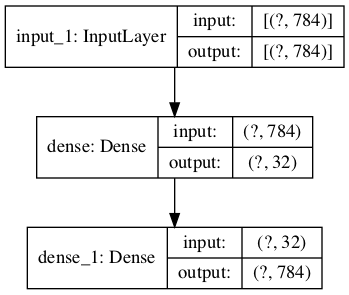

In [28]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [29]:
model.compile(optimizer="adam", loss="mse")

In [30]:
# 这里需要注意的是输入的数据和验证的数据都是一样的， 同理测试数据也相同。
model.fit(x_train_noise, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_noise, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0748 - val_loss: 0.0541
Epoch 2/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0460 - val_loss: 0.0403
Epoch 3/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0370 - val_loss: 0.0336
Epoch 4/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0321 - val_loss: 0.0299
Epoch 5/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0288 - val_loss: 0.0268
Epoch 6/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0263 - val_loss: 0.0251
Epoch 7/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0248 - val_loss: 0.0238
Epoch 8/20
60000/60000 [==============================] - 1s 9us/sample - loss: 0.0238 - val_loss: 0.0230
Epoch 9/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0231 - val_l

### 如何去使用我们的编码器和解码器

In [31]:
# 编码器
encode = tf.keras.Model(inputs=inputs, outputs=en)

# 解码器
input_de = tf.keras.layers.Input(shape=(shadow_size, ))
output_de = model.layers[-1](input_de)
decode = tf.keras.Model(inputs=input_de, outputs=output_de)

In [37]:
# 使用x_test进行效果测试
encode_test = encode(x_test_noise)

decode_test = decode(encode_test)
x_test_noise

array([[0.        , 0.        , 0.        , ..., 0.3380485 , 0.        ,
        0.60767126],
       [0.        , 0.3064172 , 0.        , ..., 0.4286565 , 0.        ,
        0.46578613],
       [0.        , 0.09826315, 0.        , ..., 0.        , 0.05449012,
        0.37215823],
       ...,
       [0.23674065, 0.        , 0.        , ..., 0.        , 0.        ,
        0.73251593],
       [0.68935376, 0.        , 0.99117464, ..., 0.24551252, 0.80995816,
        0.48349214],
       [0.42594814, 0.        , 0.        , ..., 0.527153  , 0.10119949,
        0.01435001]], dtype=float32)

### 绘图观察效果

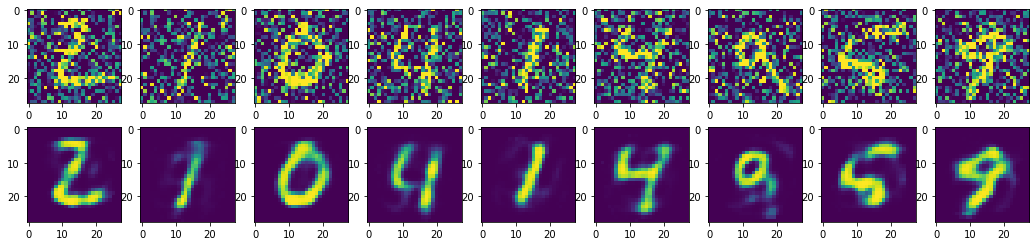

In [38]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    ax = plt.subplot(2, n, i+n)
    plt.imshow(decode_test[i].numpy().reshape(28, 28))